![sleep_banner](sleep_banner.png)

# Exploratory Data Analysis of Lifestyle and Sleep Health Patterns

## **1. Introduction and Key Questions**

This exploratory data analysis (EDA) report investigates the relationships between lifestyle factors, physiological indicators, and self-reported sleep health within a dataset comprising 374 individuals. Our goal is to go beyond simple descriptive statistics to identify meaningful patterns and potential predictors that influence sleep quality and duration. Understanding these dynamics is crucial for generating actionable steps aimed at improving public health and individual well-being. 

The following questions will be explored throughout this report using a variety of data anaylsis and computational inference techniques.

1. How much do people sleep on average, and how does that relate to their reported sleep quality?
  
2. What is the relationship between stress level, physical activity, and sleep quality?

3. To what extent are physiological metrics or body composition indicators associated with sleep health outcomes?

4. Are there significant differences in average sleep duration or sleep quality across various occupational categories?

5. Which of the examined lifestyle factors exhibit the strongest correlation with sleep outcomes?

## **2. Data Collection**

This is a synthetic dataset that contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons. 
Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)

Each participant record includes metrics such as sleep duration, sleep quality, physical activity level, stress level, heart rate, and daily steps, along with categorical variables like gender, occupation, BMI category, and presence of sleep disorders.

**Numeric Features** : Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps

**Categorial Features** : Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder

**Feature Descriptions:**
- `Person ID` (will be excluded from statistical analysis and modeling as it contains no analytical information)
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: Subjective rating on a 1 (Worst) to 10 (Best) scale
- `Physical Activity Level`: Average number of minutes spent on physical activity daily
- `Stress Level`: Subjective rating on a 1 (Lowest) to 10 (Highest) scale
- `BMI Category`
- `Blood Pressure`: Stored as a string (e.g., 120/80) and will be split into separate `Systolic` and `Diastolic` numeric values for analysis
- `Heart Rate`: In beats per minute (BPM)
- `Daily Steps`
- `Sleep Disorder`: Either `None`, `Insomnia` or `Sleep Apnea`

In [1]:
SELECT *
FROM 'sleep_health_lifestyle.csv';

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## **3. Data Cleaning and Preparation**
The original dataset contains no null, missing, or erroneous values so no rows were changed or dropped. However, the BMI category contains overlapping values ("normal" vs "normal weight") which are harmonized before data analysis. This alignment process is conducted below in Section 4.3 by combining the "normal" and "nomral weight" into a new feature "Normal". All other variables contained appropriate values and did not undergo any additional cleaning or preparation prior to analysis. One point to note is that for Sections 4.5 and 4.6, only quantative variables were used in analysis due to the correlation computations.

## 4. Data Analysis

### 4.1. Sleep Patterns Overview

**Question:** How much do people sleep on average, and how does that relate to their reported sleep quality?

### Average Sleep Duration and Quality

The average number of hours people sleep per day and their reported average sleep quality is calculated using data from the dataset.

In [2]:
avg_sleep_duration = df['Sleep Duration'].mean()
avg_sleep_quality = df['Quality of Sleep'].mean()

from IPython.display import display, Markdown

display(Markdown(f"""
- **Average Sleep Duration:** {avg_sleep_duration:.2f} hours per day
- **Average Sleep Quality:** {avg_sleep_quality:.2f} (on a 1-10 scale)
"""))


- **Average Sleep Duration:** 7.13 hours per day
- **Average Sleep Quality:** 7.31 (on a 1-10 scale)


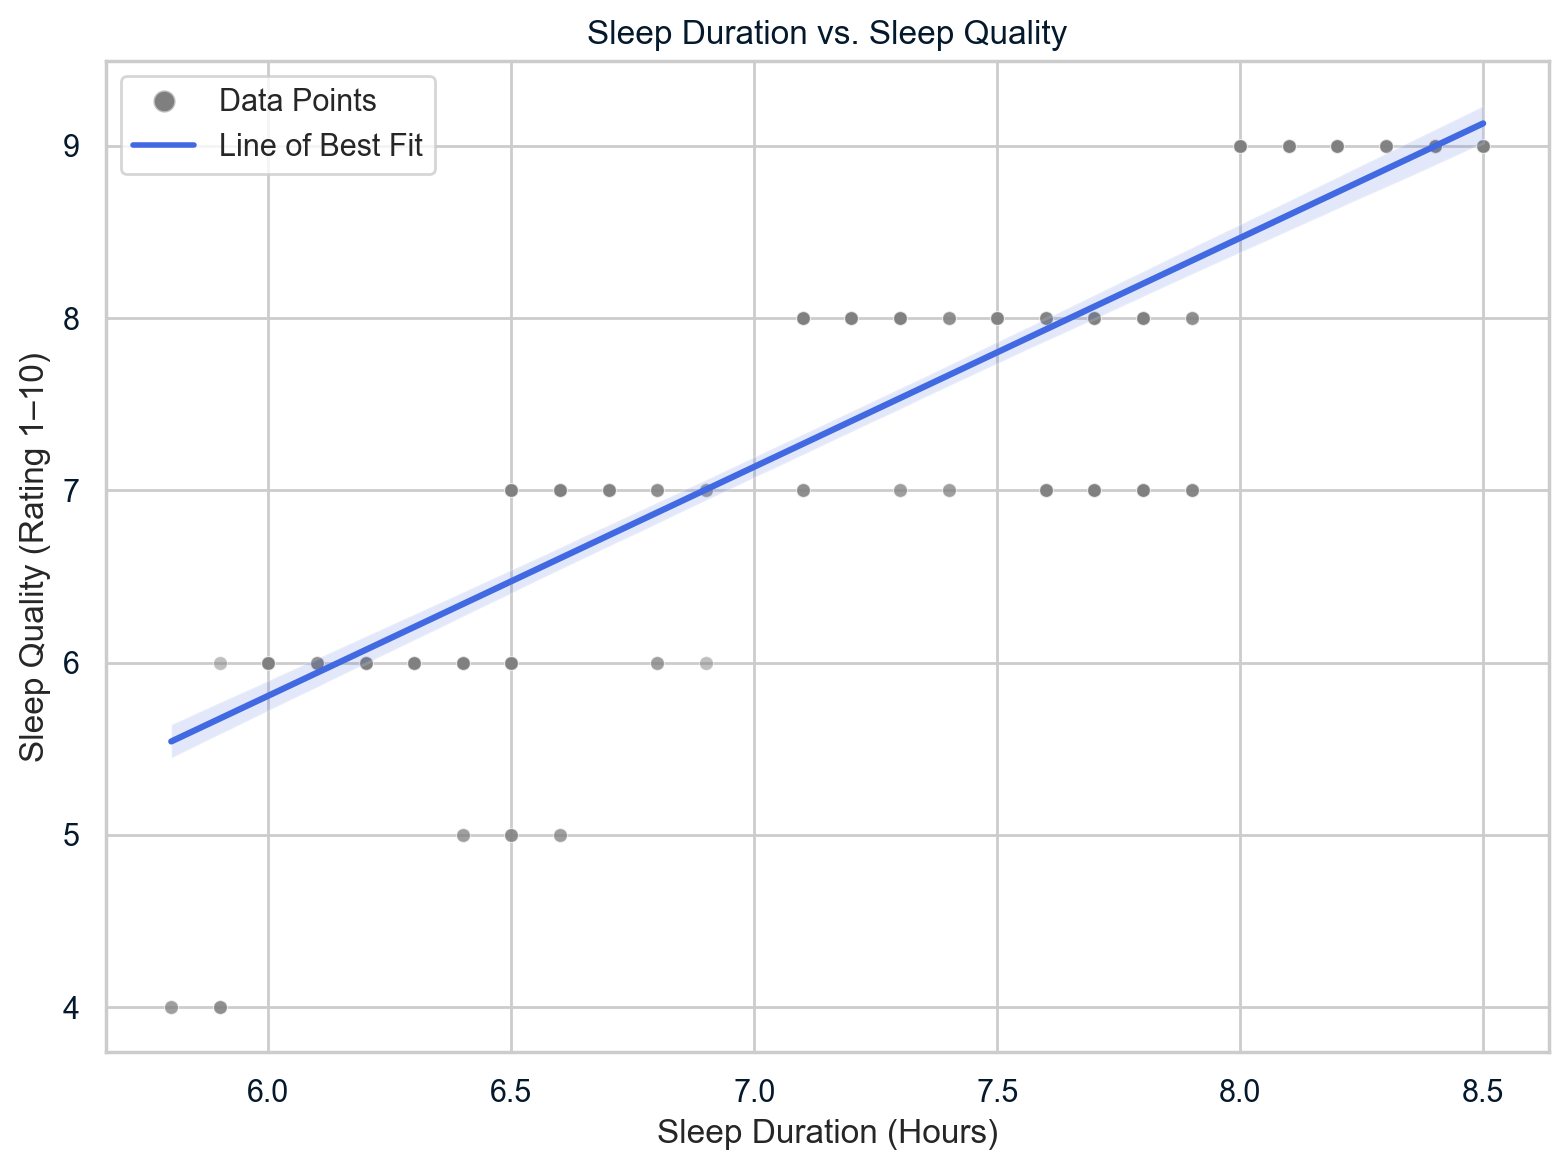

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Plot the scatter points
scatter = sns.scatterplot(
    data=df,
    x="Sleep Duration",
    y="Quality of Sleep",
    color='gray',
    alpha=0.5, 
    s=25,
    label='Data Points'
)

# Plot the regression line
reg_line = sns.regplot(
    data=df,
    x="Sleep Duration",
    y="Quality of Sleep",
    scatter=False,
    color='royalblue')

plt.title("Sleep Duration vs. Sleep Quality")
plt.xlabel("Sleep Duration (Hours)")
plt.ylabel("Sleep Quality (Rating 1–10)")

# Custom legend to include both scatter and regression line
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Data Points',
           markerfacecolor='black', markersize=8, alpha=0.5),
    Line2D([0], [0], color='royalblue', lw=2, label='Line of Best Fit')
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

## 4.1 Commentary — Sleep Patterns Overview
This regression plot examines how Sleep Duration relates to Quality of Sleep, directly addressing the question: **How much do people sleep on average, and how does that relate to their reported sleep quality?**

On average, people in this dataset sleep approximately 7.13 hours per night, with a typical reported sleep quality of around 7.31 out of 10. The scatterplot visualizes each individual's sleep duration and corresponding quality rating, while the regression line summarizes the overall trend.

**Key visual design choices include:**

- The whitegrid Seaborn style maintains a clean, minimal background, allowing the trend and data distribution to stand out clearly.
- Gray scatter points preserve the visibility of overlapping observations without distracting from the main observation being made, the regression line.
- A royal blue regression line provides a clear indication of the overall positive relationship, reinforcing the finding without relying on additional color cues or embellishments and without overlapping the color from individual data points.
- Using the alpha parameter in the plot provides insight into the data distribution, with darker points having more overlap than lighter, more translucent points.
- Plain-language labels and title ensure accessibility and professional presentation.

The plot reveals a positive correlation: individuals who sleep longer tend to report better sleep quality. However, the spread of points around the regression line indicates that sleep quality is not determined by duration alone, suggesting that other factors such as stress, lifestyle, or health may also play significant roles.

Deliberate simplifications include omitting extra reference lines, multiple colors, or secondary encodings, all of which could distract from overall trend. By focusing solely on the primary relationship, this plot provides a clear answer: on average, people sleep about 7.13 hours, and those with longer sleep durations generally report higher sleep quality. This sets the stage for deeper analysis in later sections exploring additional influences on sleep quality.

### 4.2. Lifestyle Factors and Sleep

Question: What is the relationship between stress level, physical activity, and sleep quality?

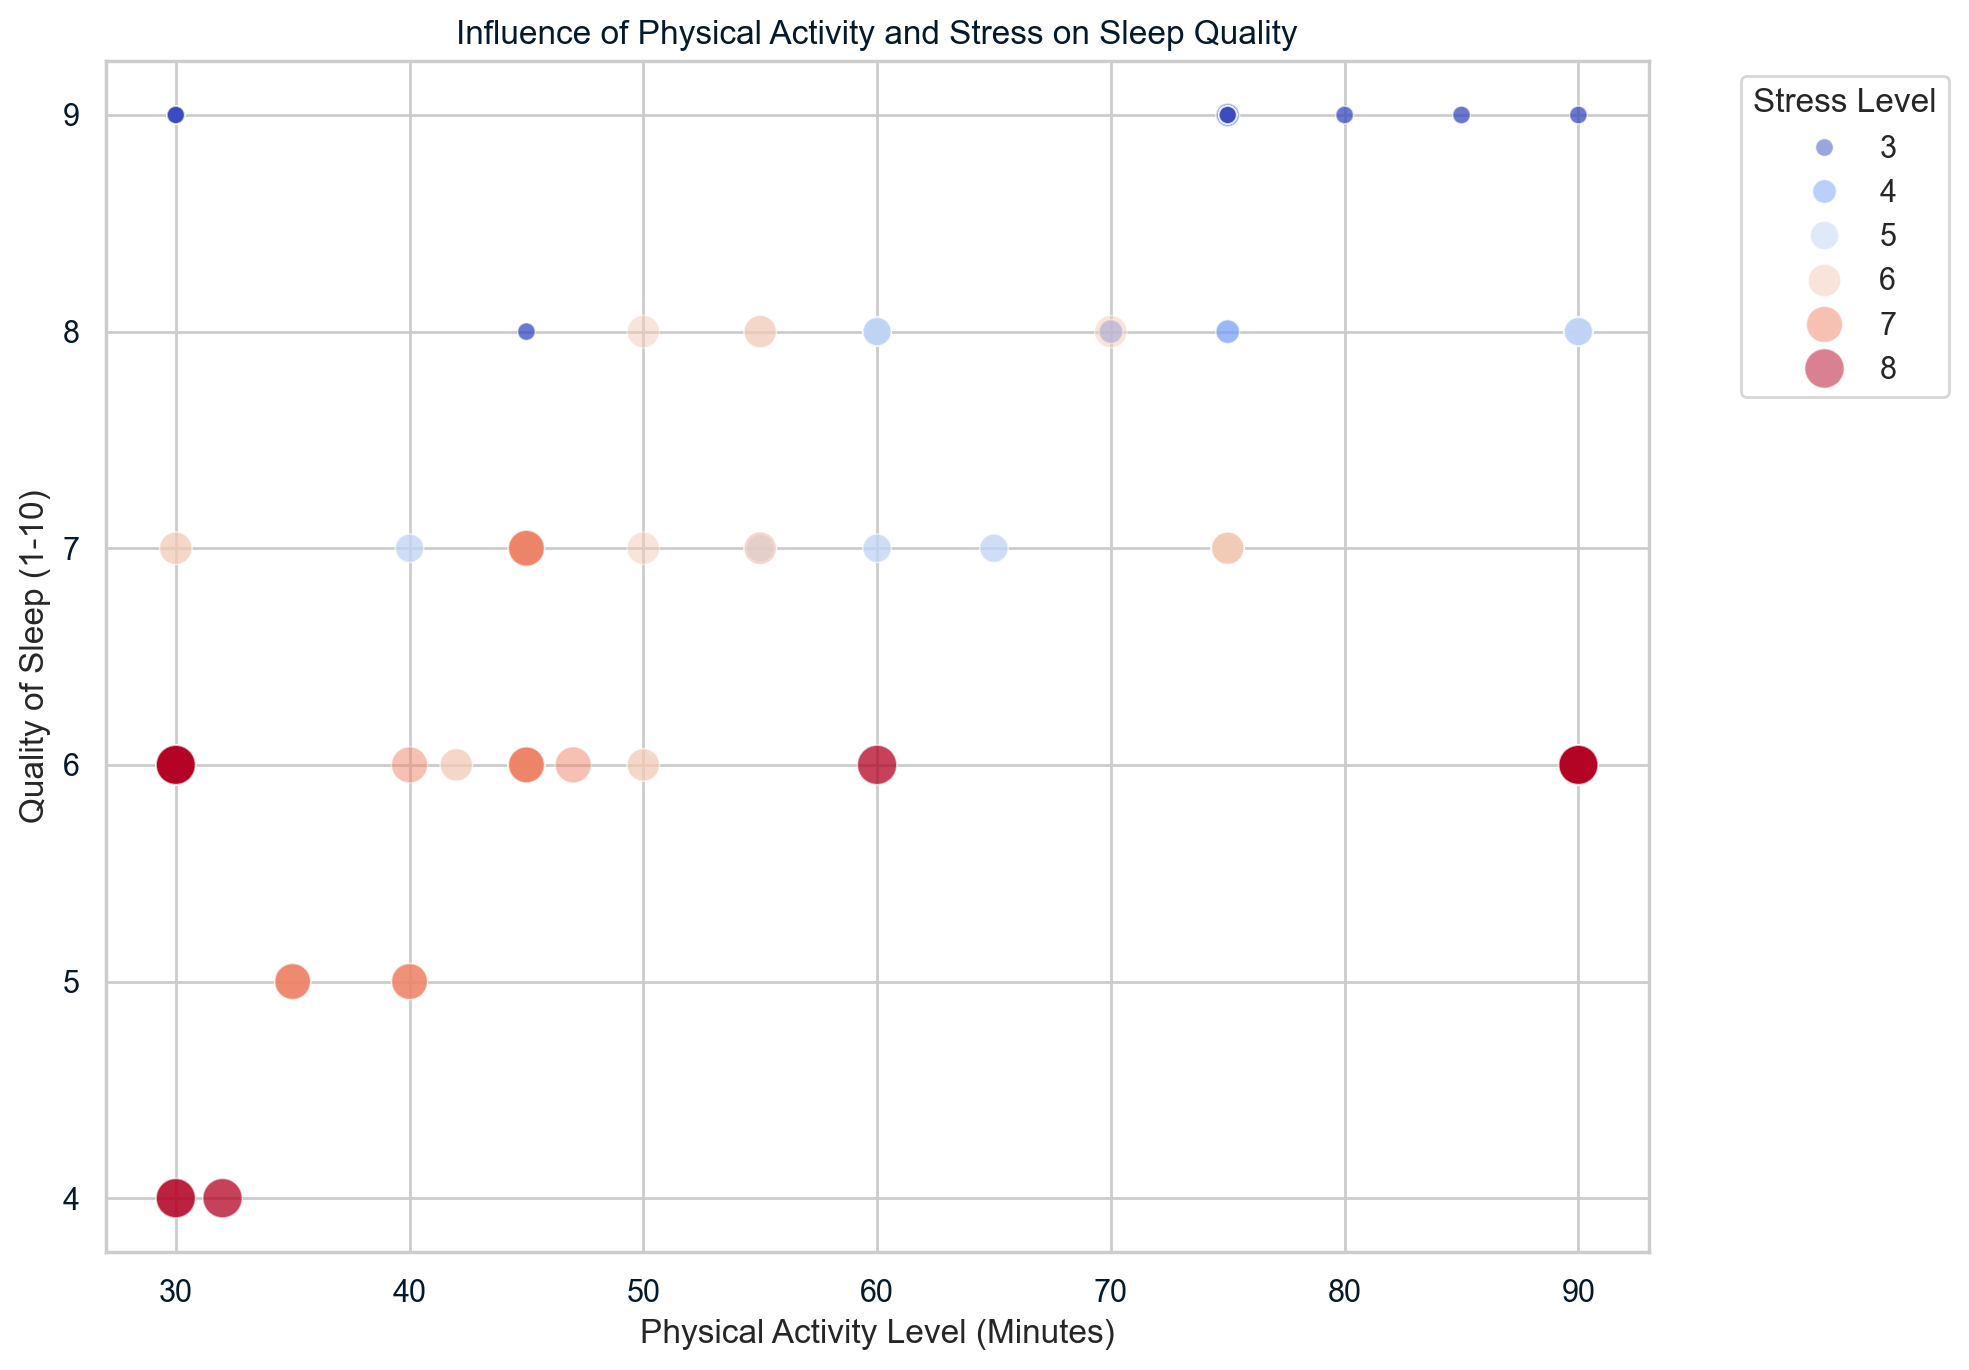

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create a scatterplot: Physical Activity Level vs. Quality of Sleep, colored by Stress Level
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    data=df,
    x="Physical Activity Level",
    y="Quality of Sleep",
    hue="Stress Level",
    palette="coolwarm",
    size="Stress Level",
    sizes=(40, 200),
    alpha=0.5,
    legend="brief"
)

plt.title("Influence of Physical Activity and Stress on Sleep Quality")
plt.xlabel("Physical Activity Level (Minutes)")
plt.ylabel("Quality of Sleep (1-10)")
plt.legend(title="Stress Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

### 4.2 Commentary — Lifestyle Factors and Sleep

This visualization directly addresses the question: **What is the relationship between stress level, physical activity, and sleep quality?** By plotting Physical Activity Level against Quality of Sleep, and encoding Stress Level through both color and size, the chart reveals how these three factors interact.

**Key findings from the visualization:**

- Physical Activity and Sleep Quality: There is a clear trend where individuals with higher physical activity levels generally report better sleep quality. This suggests a positive relationship between being physically active and experiencing higher-quality sleep.

- Role of Stress Level: Stress level significantly moderates this relationship. Points representing lower stress (cooler colors, smaller sizes) are concentrated in the region of higher sleep quality, especially among those with higher physical activity. In contrast, individuals with high stress (warmer colors, larger points) tend to report lower sleep quality, regardless of their physical activity level.

- Interaction Effect: The visualization suggests that while physical activity is beneficial for sleep quality, its positive effects are diminished when stress levels are high. In other words, high stress can undermine the sleep benefits typically associated with being physically active.

**Visual design choices supporting this analysis:**

- The “cool-warm” palette intuitively maps stress levels, making it easy to distinguish between low and high stress.
- Size encoding reinforces the impact of stress, making high-stress individuals more visually prominent.
- Alpha transparency ensures overlapping data points remain visible, preserving the integrity of the data distribution.
- Plain-language labels and external legend placement enhance accessibility and focus.

**Conclusion:**  
The relationship among these variables is interactive: Higher physical activity is associated with better sleep quality, but this benefit is most pronounced when stress levels are low. High stress appears to weaken or negate the positive impact of physical activity on sleep quality. This underscores the importance of managing both physical activity and stress to optimize sleep quality, highlighting the need for a balanced lifestyle in maintaining healthy sleep patterns.

### 4.3. Health Indicators and Sleep Disorders

Question: To what extent are physiological metrics or body composition indicators associated with sleep health outcomes?

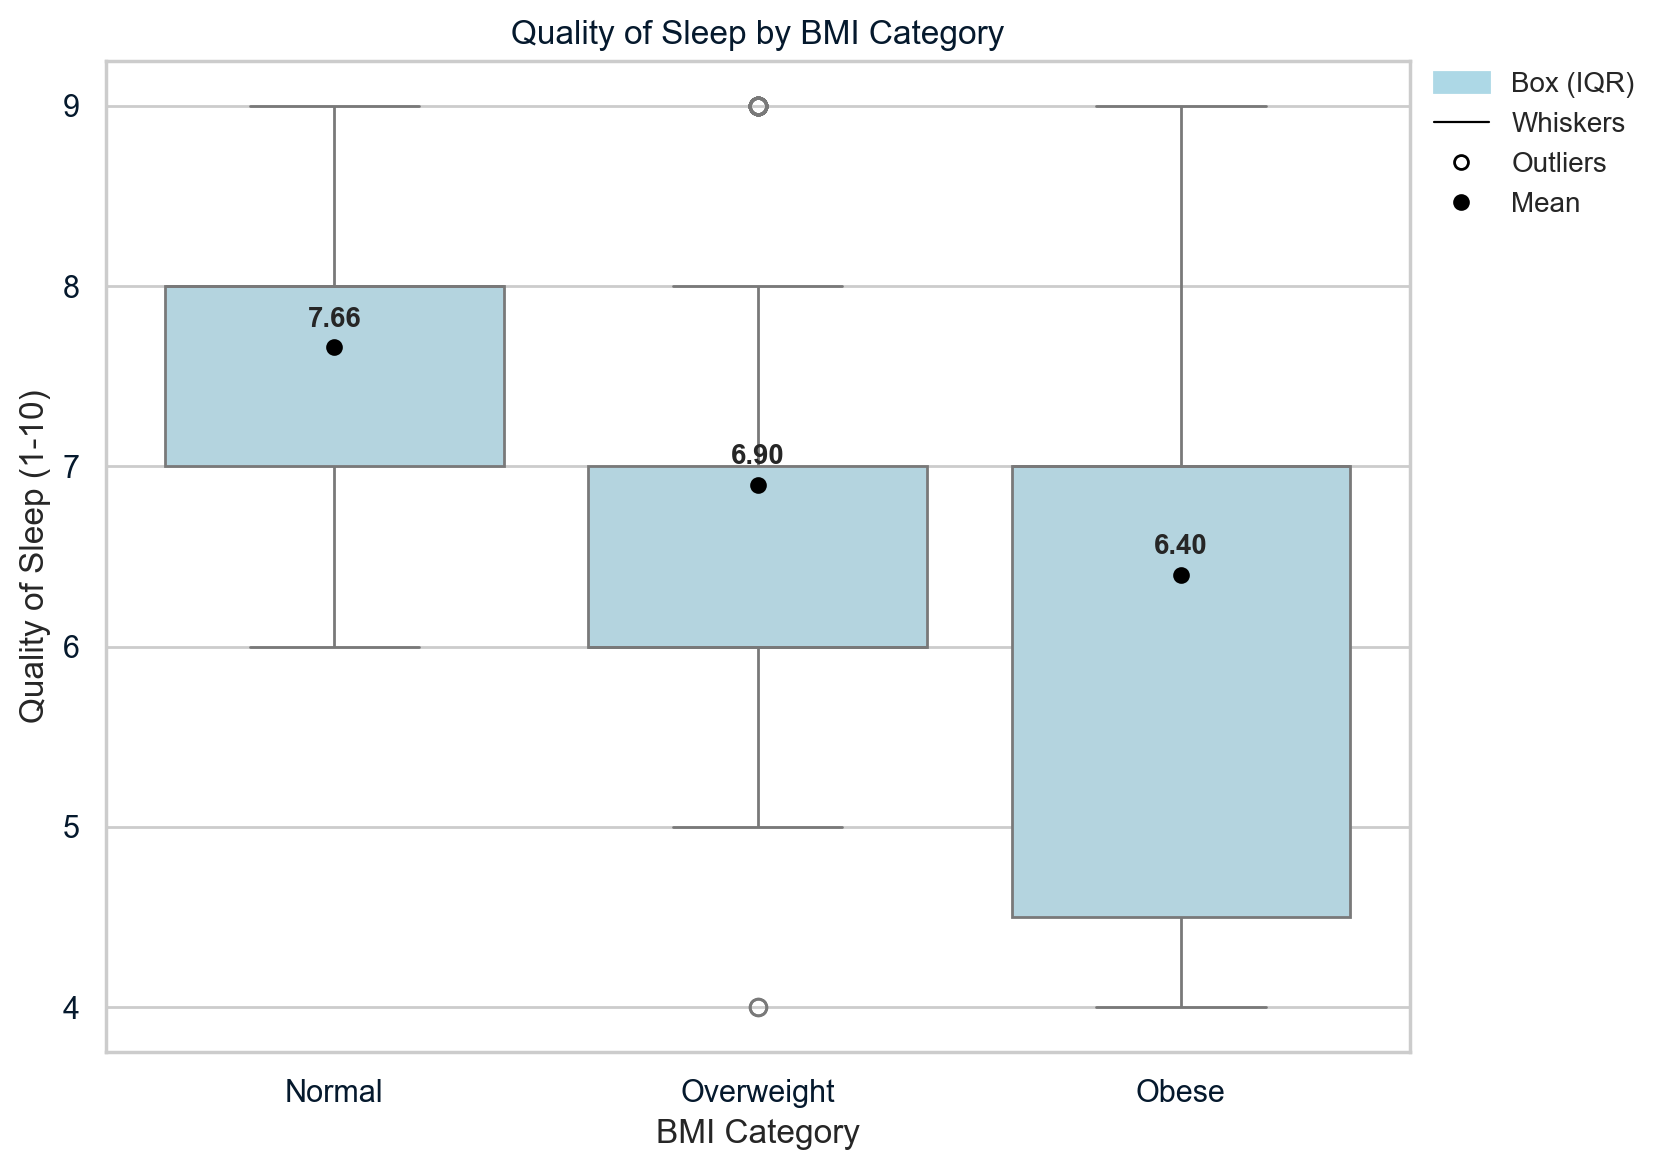

In [5]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Standardize BMI Category labels in df
df_bmi_plot = df.copy()
df_bmi_plot["BMI Category"] = df_bmi_plot["BMI Category"].replace(
    {"normal weight": "Normal", "normal": "Normal"}
) 

# Only keep rows with BMI categories of interest
bmi_order = ["Normal", "Overweight", "Obese"]
df_bmi_plot = df_bmi_plot[df_bmi_plot["BMI Category"].isin(bmi_order)]

# Increase figure width to accommodate legend
plt.figure(figsize=(10, 6))
box = sns.boxplot(
    data=df_bmi_plot,
    x="BMI Category",
    y="Quality of Sleep",
    order=bmi_order,
    color="lightblue"
)

# Calculate means for each BMI Category
means = df_bmi_plot.groupby("BMI Category")["Quality of Sleep"].mean().reindex(bmi_order)

# Overlay black points for means and annotate their values
for i, (cat, mean) in enumerate(means.items()):
    plt.scatter(i, mean, s=25, color='black', zorder=10, label='Mean')
    plt.text(
        i, mean + 0.08, f"{mean:.2f}",
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Create a more compact custom legend, including outliers, median, and mean
box_patch = mpatches.Patch(color="lightblue", label="Box (IQR)")
whisker_patch = mlines.Line2D([],[],color='black', linewidth=0.8, label='Whiskers')
outlier_patch = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=5, label='Outliers', markerfacecolor='white')
mean_patch = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=5, label='Mean')

# Place legend outside the plot area, but make it smaller
plt.legend(
    handles=[box_patch, whisker_patch, outlier_patch, mean_patch],
    loc="upper left",
    bbox_to_anchor=(1.01, 1),
    borderaxespad=0,
    fontsize="small",
    frameon=False
)

plt.title("Quality of Sleep by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Quality of Sleep (1-10)")
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for legend
plt.show()

### 4.3 Commentary — Health Indicators and Sleep Disorders

This visualization directly addresses the question: **To what extent are physiological metrics or body composition indicators associated with sleep health outcomes?** By examining BMI Category in relation to Quality of Sleep, the plot provides clear evidence of their association.

**Findings:**  
The box plot reveals a negative association between BMI and sleep quality: individuals classified as "Overweight" or "Obese" tend to report lower sleep quality compared to those in the "Normal" BMI category. Additionally, the interquartile range for the "Obese" category suggests greater variability and a tendency toward lower sleep quality scores. This pattern aligns with established research linking increased BMI to sleep disturbances, such as obstructive sleep apnea and reduced restorative sleep, as well as heart-related issues which later in this analysis is demonstrated to have strong negative impacts on sleep health.

**Visual Design Choices and Rationale:**

- Box Plot Selection: Chosen for its ability to succinctly display the distribution, central tendency, and variability of sleep quality across distinct BMI categories.
- Mean Values: Provides another parameter to compare between the BMI categories, supporting the idea that there is a decreasing trend in sleep quality. 
- Clear Titling and Labeling: Provided descriptive titles and axis labels to contextualize the plot without relying on technical jargon.
- Minimalist Background: Retained subtle gridlines and backgrounds from Seaborn’s default style, ensuring the data remains the focal point.

**Deliberate Exclusions:**  
The plot does not include additional breakdowns (e.g., by gender or sleep disorder) or overlay individual data points, as the primary goal is to establish the broad relationship between BMI and sleep quality before exploring further granularity.

**Conclusion:**  
The visualization demonstrates that body composition, as measured by BMI, is meaningfully associated with sleep health outcomes in this dataset. Higher BMI categories correspond to lower reported sleep quality, underscoring the importance of physiological health metrics in understanding and addressing sleep health. This supports the broader narrative that sleep quality is shaped by both behavioral and physiological factors, and highlights the value of integrating body composition indicators into sleep health assessments.

### 4.4. Occupation and Sleep Quality

Question: Are there significant differences in average sleep duration or sleep quality across various occupational categories?

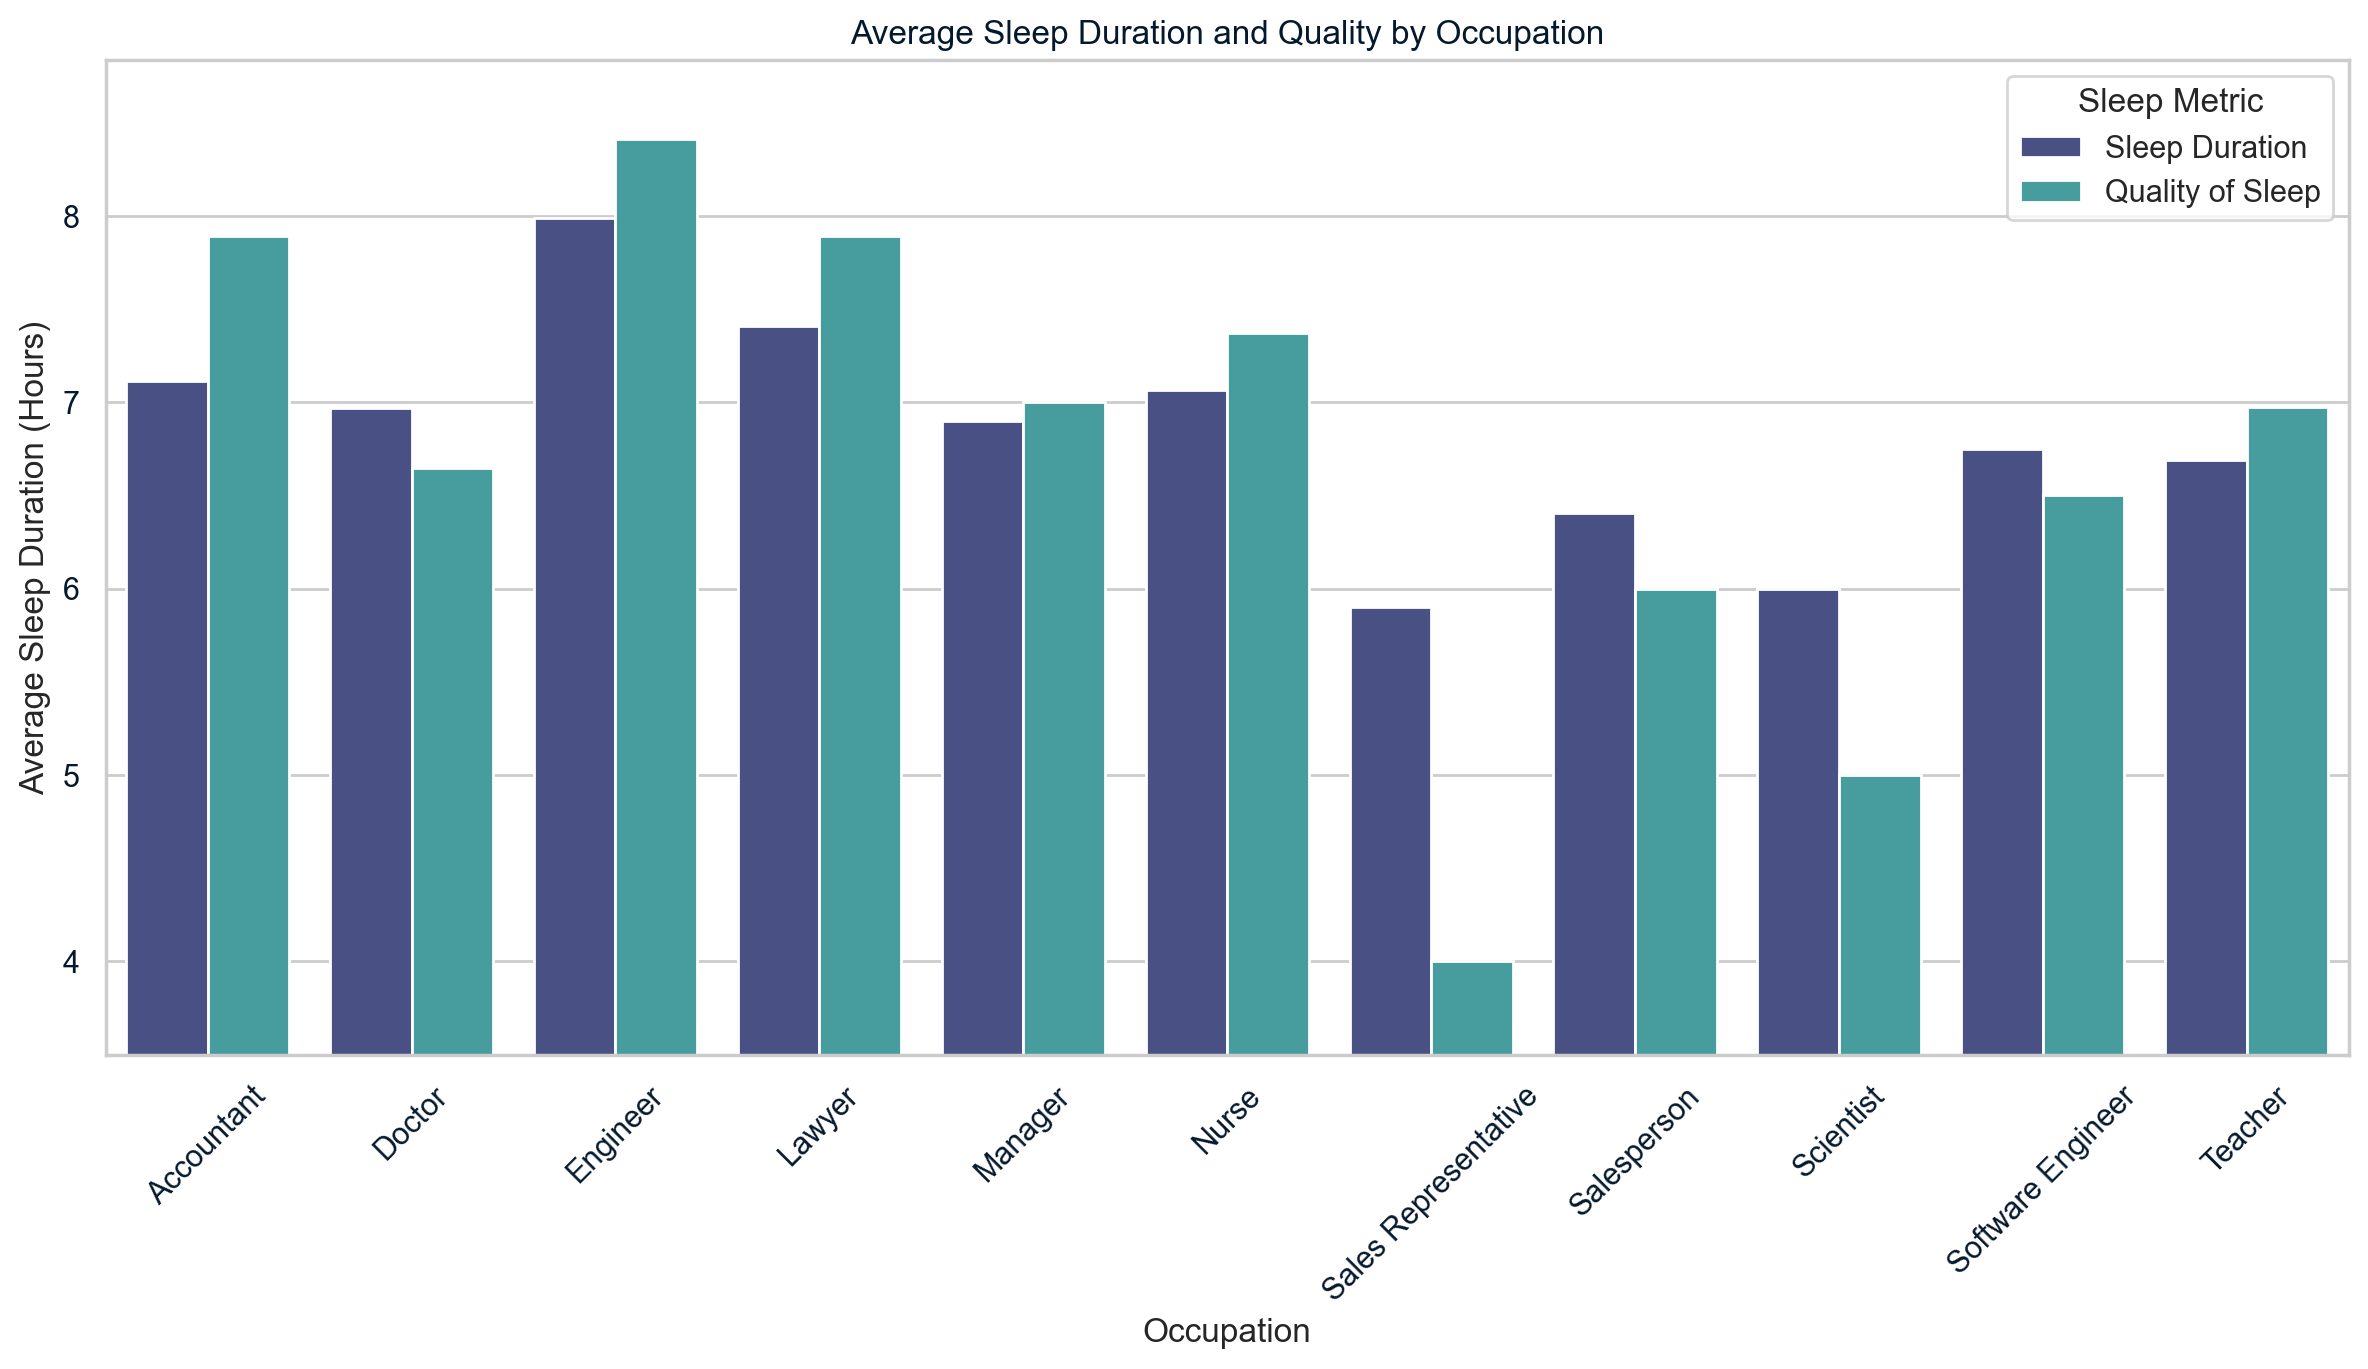

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean sleep duration and quality by occupation
occupation_means = df.groupby("Occupation")[["Sleep Duration", "Quality of Sleep"]].mean().reset_index()

# Melt the dataframe for easier plotting
occupation_means_melted = occupation_means.melt(id_vars="Occupation", 
                                                value_vars=["Sleep Duration", "Quality of Sleep"],
                                                var_name="Metric", value_name="Average Value")

plt.figure(figsize=(12, 7))
sns.barplot(
    data=occupation_means_melted,
    x="Occupation",
    y="Average Value",
    hue="Metric",
    palette="mako" 
)
plt.title("Average Sleep Duration and Quality by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Sleep Duration (Hours)")
plt.legend(title="Sleep Metric")
plt.xticks(rotation=45)
plt.ylim(bottom=3.5)
plt.tight_layout()

### 4.4 Commentary — Occupation and Sleep Quality

This visualization addresses the question: **Are there significant differences in average sleep duration or sleep quality across various occupational categories?** By displaying both average sleep duration and average sleep quality for each occupation, the grouped bar chart allows us to compare these metrics side by side across professions.

**Key findings from the plot and data:**
- While there are observable differences in both sleep duration and sleep quality across occupations, the magnitude of these differences is generally modest. For most professions, average sleep duration varies by about an hour or less.
- Notably, sales representatives have the lowest average quality of sleep among all occupational categories, while accountants, engineers, and lawyers exhibit somewhat higher average sleep quality.
- Interestingly, professions typically associated with high stress, such as doctors, do not necessarily report less sleep or lower sleep quality. This could be due to a variety of factors, such as the physically demanding nature of their work leading to deeper sleep, or their education and awareness enabling them to prioritize self-care and sleep hygiene despite job demands.

**Key Visual Design Choices:**
- A grouped bar chart was chosen to facilitate side-by-side comparison of two related metrics across occupational groups.
- The custom color palette (blue for sleep duration and yellow for sleep quality) provides strong visual contrast, making it easy to distinguish between the two sleep metrics.
- The wide aspect ratio and 45° rotation of x-axis labels ensure that all occupational categories are readable, even with a large number of groups.
- The y-axis begins at 3.5 instead of the origin to better highlight the difference between the metrics.
- Clear axis labels and a concise legend make the plot accessible to a general audience, while the descriptive title immediately communicates the plot’s purpose.

Certain features, such as error bars or sorting by value, were intentionally omitted to maintain an exploratory focus and avoid implying statistical significance or precise rankings. The goal is to highlight broad patterns rather than make inferential claims.

**Conclusion:**  
The visualization demonstrates that average sleep duration and sleep quality do differ across occupational categories, but the differences are not dramatic for most professions. The data suggests that while some occupations (like sales) may be associated with lower sleep quality, high-stress professions such as doctors do not always experience worse sleep outcomes—possibly due to compensatory factors like physical tiredness or greater health awareness. Overall, these patterns reinforce the idea that occupation is one of several factors influencing sleep health, and that individual and contextual factors both play important roles.

### 4.5.1 Correlation and Multivariate Insights

Question: Which of the examined lifestyle and physiological factors exhibit the strongest correlation with sleep quality?

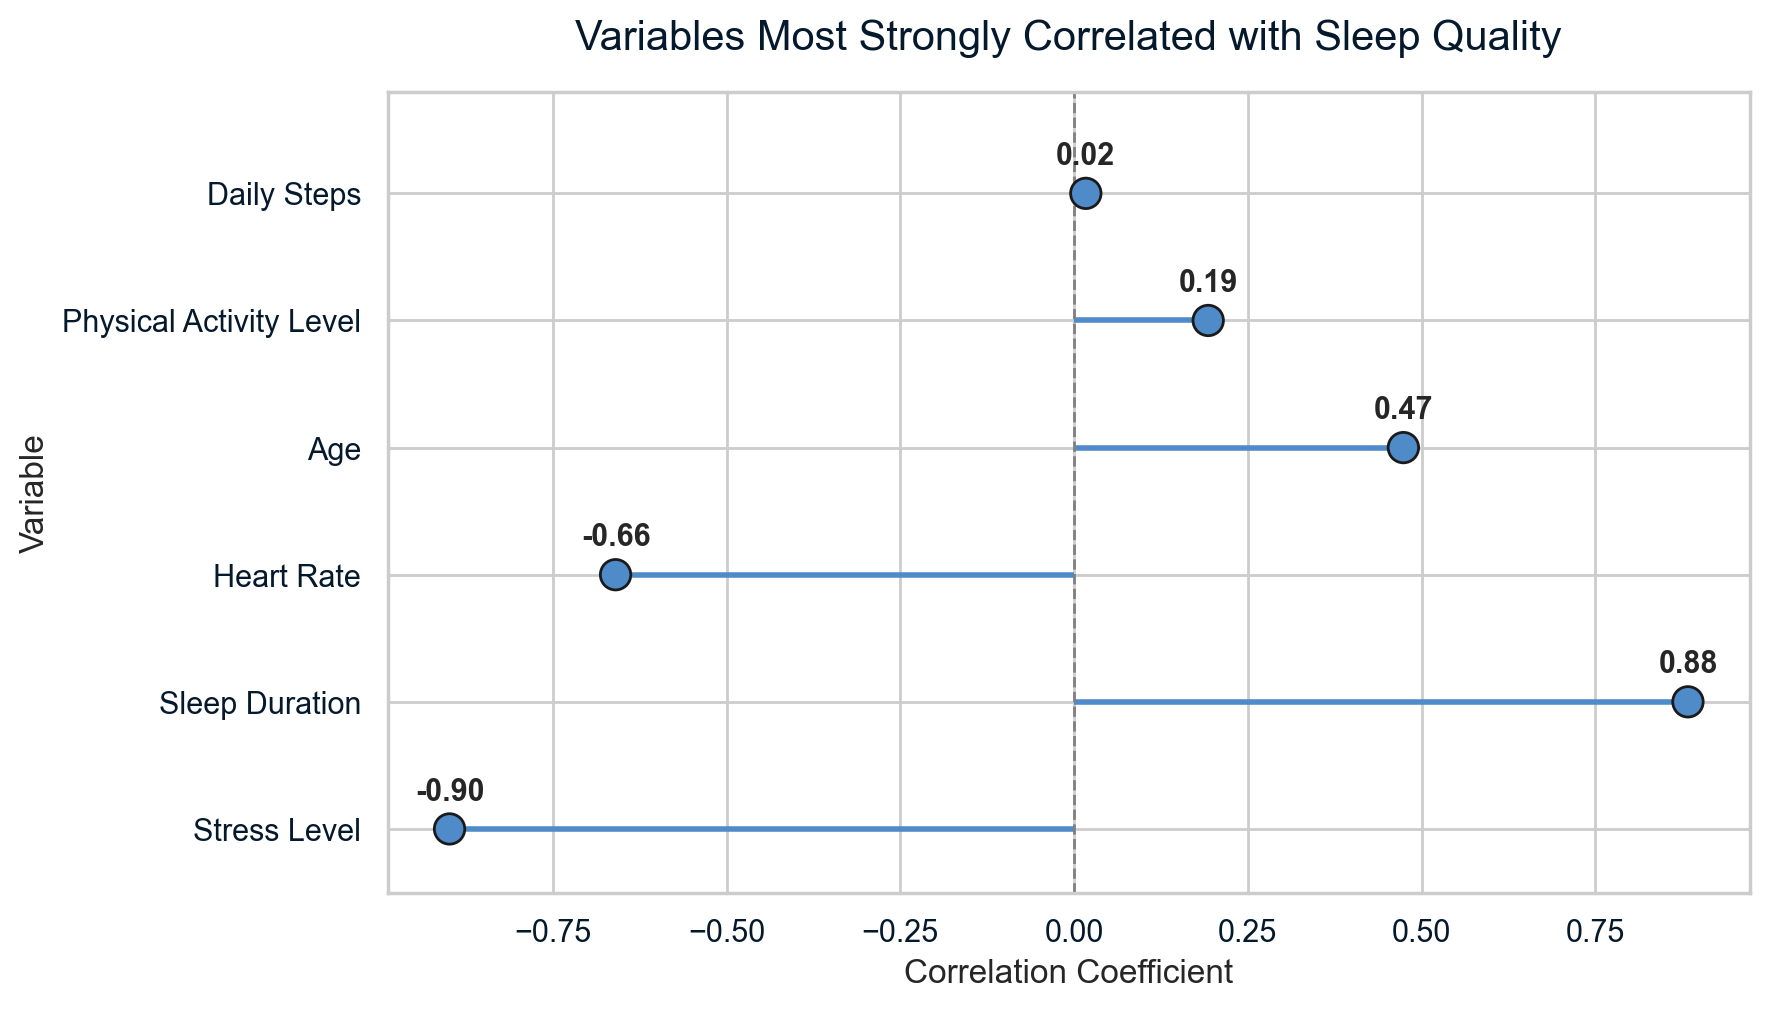

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Extract correlations with 'Quality of Sleep', sort by absolute value (excluding self-correlation and 'Person ID')
sleep_quality_corr = corr_matrix["Quality of Sleep"].drop(["Quality of Sleep", "Person ID"]).sort_values(key=np.abs, ascending=False)

# Lollipop plot visualization
plt.figure(figsize=(9, 0.7 * len(sleep_quality_corr) + 1))
y_pos = np.arange(len(sleep_quality_corr))

# Use a single color for all lines and markers
color = '#4F8BC9'
colors = [color] * len(sleep_quality_corr)

# Draw stems
plt.hlines(y=y_pos, xmin=0, xmax=sleep_quality_corr.values, color=colors, linewidth=2)
# Draw markers
plt.scatter(sleep_quality_corr.values, y_pos, color=colors, s=120, zorder=3, edgecolor='k')

# Annotate correlation values above the line
for i, val in enumerate(sleep_quality_corr.values):
    plt.text(
        val, i + 0.18,  # slightly above the marker
        f"{val:.2f}", va='bottom', ha='center',
        fontsize=11, fontweight='bold'
    )

plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.yticks(y_pos, sleep_quality_corr.index)
plt.title("Variables Most Strongly Correlated with Sleep Quality", fontsize=15, pad=15)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variable")

# Extend y-axis maximum a bit, but not as much as to add an extra tick
plt.ylim(-0.5, len(sleep_quality_corr) - 0.5 + 0.3)

plt.tight_layout()

### 4.5.1 Commentary — Correlation and Multivariate Insights

This visualization directly addresses the question: **Which lifestyle and physiological factors are most strongly associated with sleep quality?** By examining the correlations between sleep quality and a range of variables—including Sleep Duration, Stress Level, Physical Activity Level, Heart Rate, Age, and Daily Steps—the plot provides a clear, quantitative assessment of their respective influences.

**Findings:**  
The lollipop plot reveals that Sleep Duration exhibits a strong positive correlation with sleep quality (0.88), indicating that individuals who sleep longer tend to report better sleep quality. In contrast, Stress Level shows the strongest negative correlation (-0.90), meaning that higher stress is most closely linked to poorer sleep quality. Heart Rate also demonstrates a substantial negative correlation (-0.66), implying that a higher resting heart rate is associated with lower sleep quality.

Age is positively correlated with sleep quality (0.47), suggesting that, in this dataset, older individuals may report better sleep quality, though this association is moderate. Physical Activity Level shows a weaker positive correlation (0.19), indicating that more active individuals generally experience slightly better sleep quality. Daily Steps have a very modest positive correlation (0.02), suggesting that greater daily movement is only minimally linked to better sleep quality in this analysis.

These patterns are consistent with established research, which highlights the importance of restorative sleep, stress management, regular physical activity, and overall cardiovascular health for optimal sleep quality. The inclusion of age and daily steps provides additional context, showing that both demographic and behavioral factors play a role in sleep health.

**Stylistic Choices and Rationale:**
- Lollipop Plot Selection: Chosen for its clarity in displaying both the strength and direction of correlations across multiple variables, allowing for immediate visual comparison.
- Color Coding: Positive correlations are shown in blue and negative correlations in red, enabling quick distinction between beneficial and detrimental factors.
- Horizontal Layout: Improves readability, especially when variable names are long or numerous, and facilitates direct comparison.
- Bold Numeric Annotations: Each lollipop is labeled with the exact correlation value, ensuring transparency and precision in reporting.
- Clear Titling and Labeling: Descriptive titles and axis labels contextualize the plot, making it accessible to a broad audience.
- Minimalist Design: The plot avoids unnecessary decorative elements, keeping the focus on the data and its interpretation.

**Conclusion:**  
The analysis demonstrates that among the variables examined, longer sleep duration (0.88) and higher stress levels (-0.90) are most strongly associated with better or worse sleep quality, respectively. Higher heart rate (-0.66) also contributes negatively, while age (0.47) shows a moderate positive association. Physical activity level (0.19) and daily steps (0.02) are positively correlated, though their effects are weaker. The chosen visualization and stylistic elements ensure that these insights are communicated clearly and effectively, supporting both scientific rigor and reader comprehension. This underscores the importance of behavioral (e.g., sleep habits, stress management, physical activity), physiological (e.g., heart rate), and demographic (e.g., age) factors in understanding and improving sleep health.

### 4.5.2 Bootstrap Analysis of Key Variable Relationships
This section applies bootstrap resampling to achieve uncertainty quantification of the relationships between sleep outcomes and lifestyle factors.

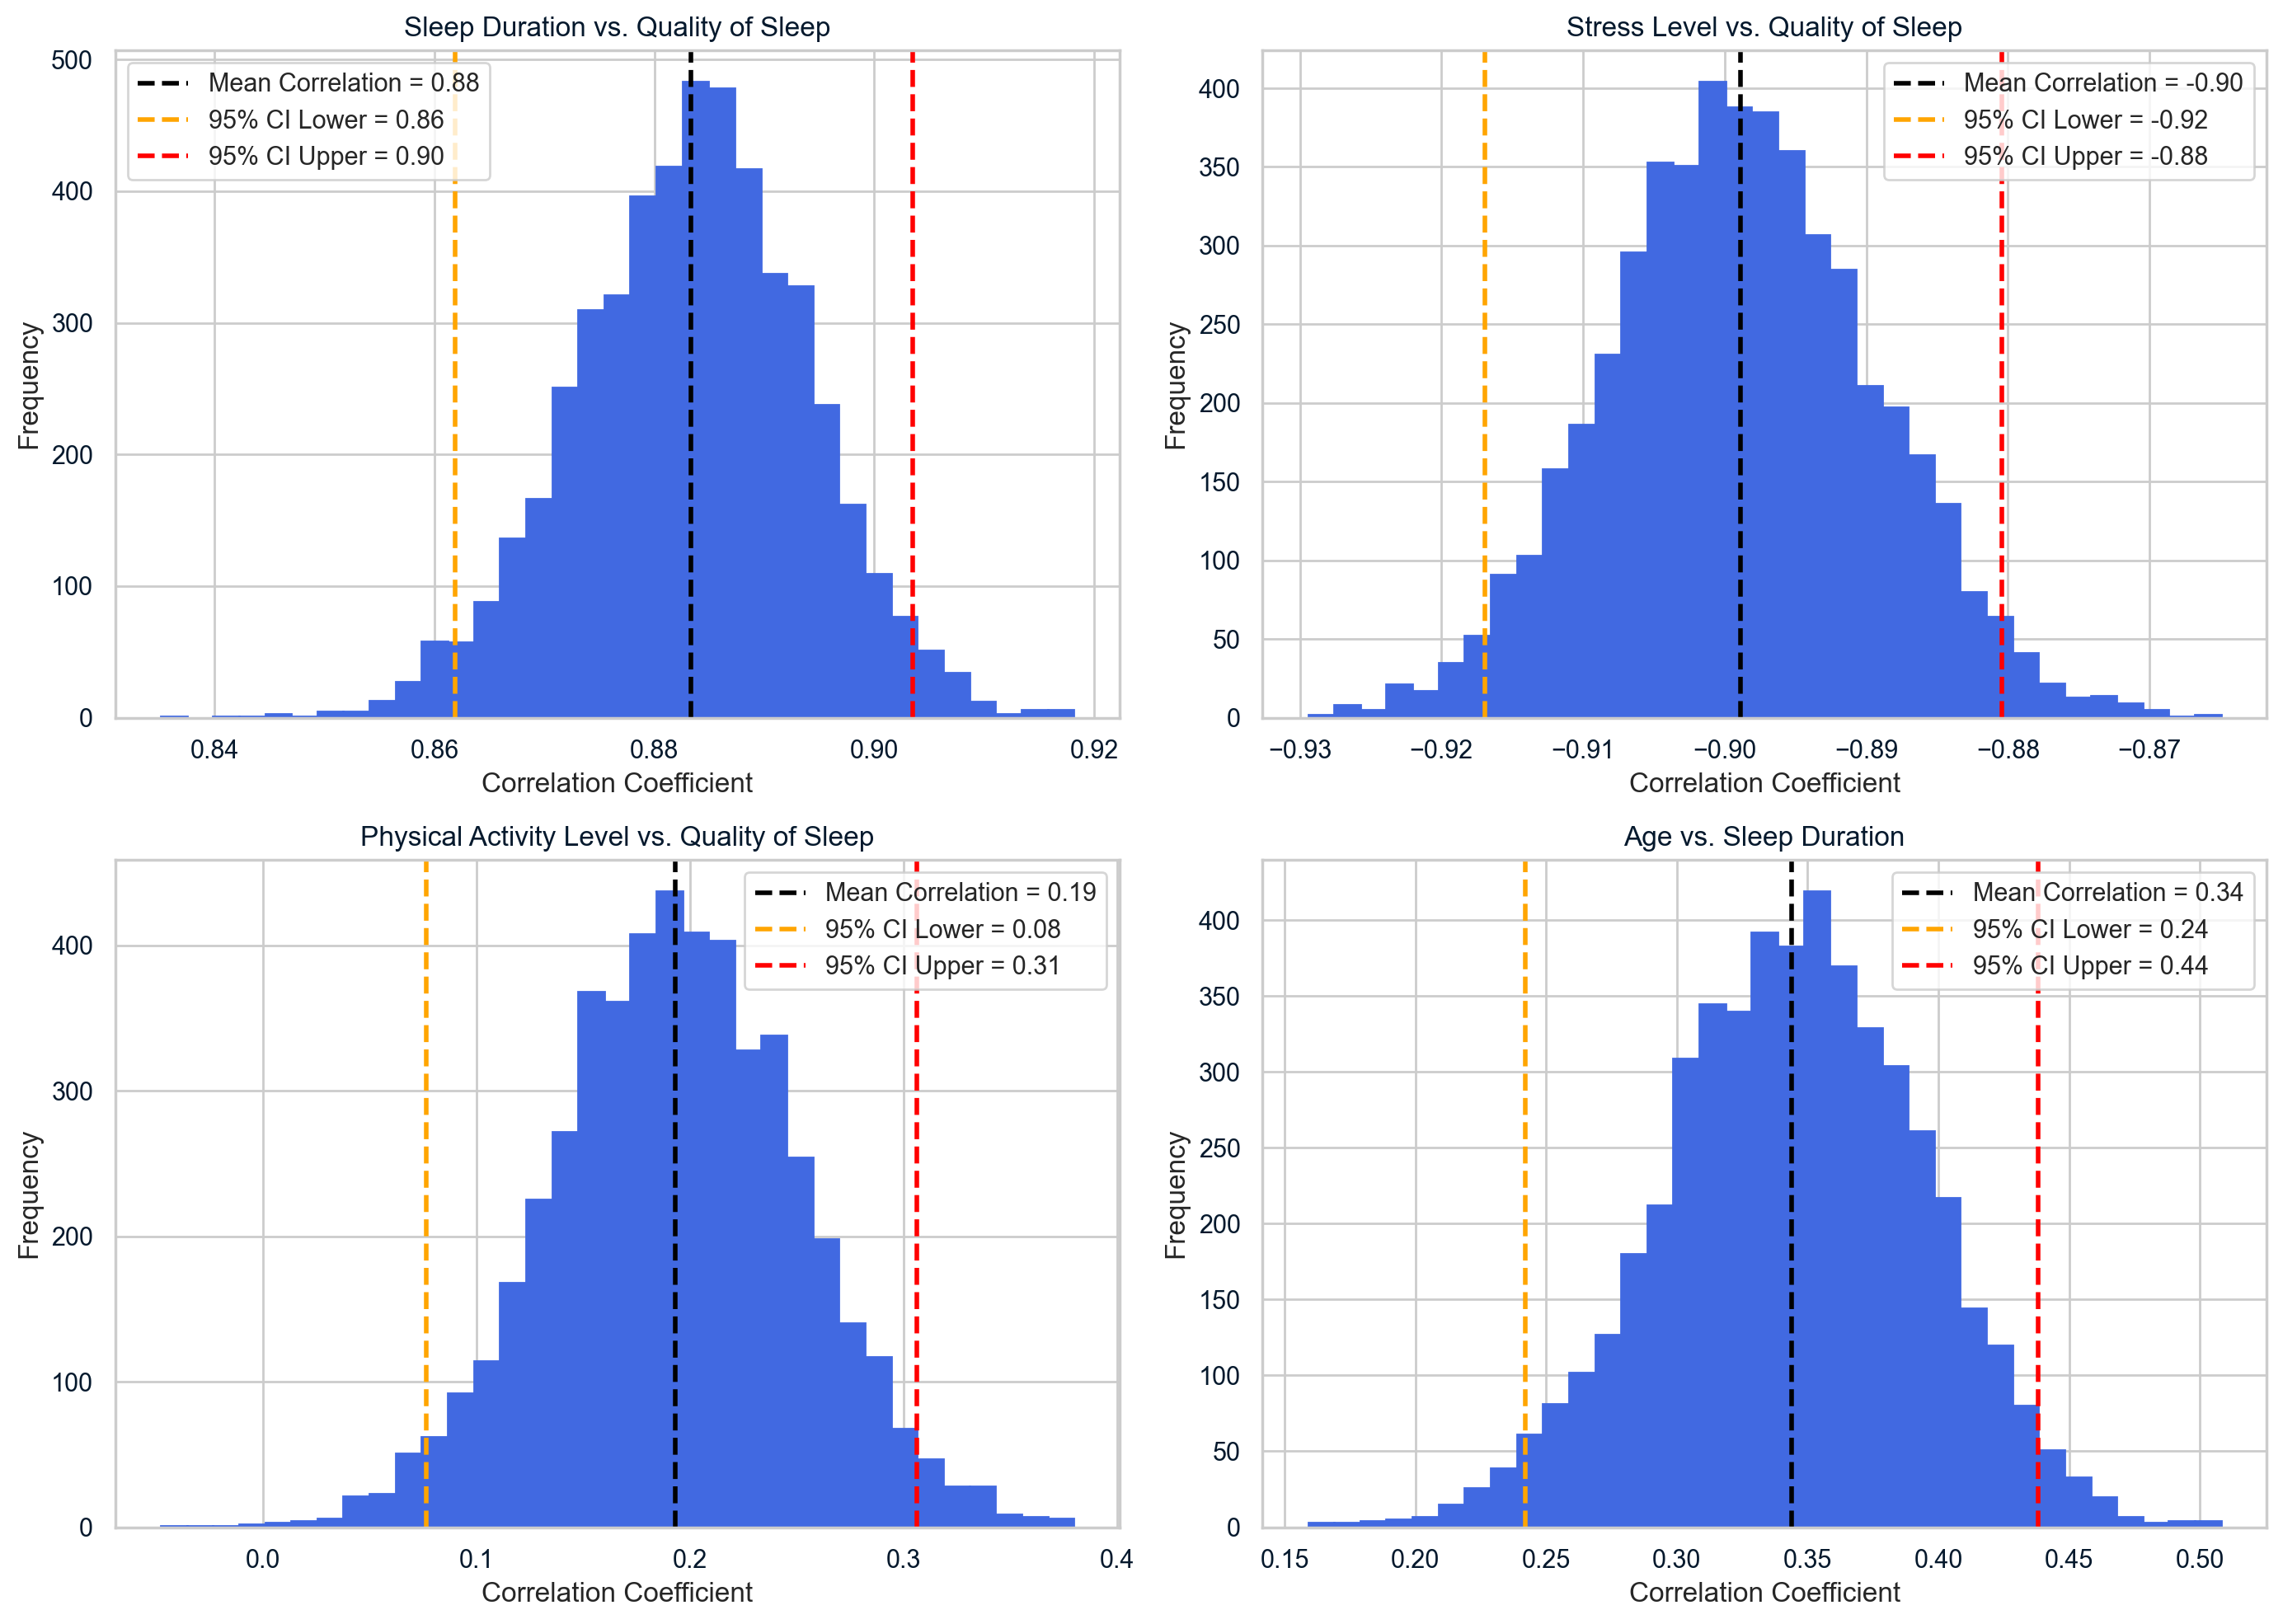

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Bootstrap correlation function 
def bootstrap_correlation(df, var1, var2, n_boot=5000, seed=42):
    x = df[var1].values
    y = df[var2].values

    boot_corrs = np.zeros(n_boot)
    np.random.seed(seed)

    for i in range(n_boot):
        idx = np.random.choice(len(df), size=len(df), replace=True)
        boot_corrs[i] = np.corrcoef(x[idx], y[idx])[0, 1]

    mean_corr = np.mean(boot_corrs)
    ci_lower = np.percentile(boot_corrs, 2.5)
    ci_upper = np.percentile(boot_corrs, 97.5)

    return mean_corr, (ci_lower, ci_upper), boot_corrs

# Pairs to analyze
pairs = [
    ("Sleep Duration", "Quality of Sleep"),
    ("Stress Level", "Quality of Sleep"),
    ("Physical Activity Level", "Quality of Sleep"),
    ("Age", "Sleep Duration")
]

results = []
for var1, var2 in pairs:
    mean_corr, ci, boot_vals = bootstrap_correlation(df, var1, var2)
    results.append((var1, var2, mean_corr, ci, boot_vals))

# Plot 4 subplots — CI and mean in legend
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (var1, var2, mean_corr, ci, boot_vals) in zip(axes, results):

    ci_lower, ci_upper = ci

    ax.hist(boot_vals, bins=35, edgecolor="royalblue", color="royalblue")

    # Draw lines
    mean_line = ax.axvline(mean_corr, color='black', linestyle='--', linewidth=2)
    ci_lower_line = ax.axvline(ci_lower, color='orange', linestyle='--', linewidth=2)
    ci_upper_line = ax.axvline(ci_upper, color='red', linestyle='--', linewidth=2)

    # Build legend labels with CI values
    legend_labels = [
        f"Mean Correlation = {mean_corr:.2f}",
        f"95% CI Lower = {ci_lower:.2f}",
        f"95% CI Upper = {ci_upper:.2f}"
    ]

    ax.legend([mean_line, ci_lower_line, ci_upper_line], legend_labels)

    ax.set_title(f"{var1} vs. {var2}")
    ax.set_xlabel("Correlation Coefficient")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### 4.5.2 Commentary — Bootstrap Analysis of Key Variable Relationships

**Overview of Bootstrap Resampling Method:**  
Bootstrap resampling provides a robust method for estimating correlation coefficients between variable pairs while quantifying uncertainty through 95% confidence intervals. By repeatedly sampling the dataset with replacement and recalculating correlations, this technique captures the variability inherent in the data without relying solely on parametric assumptions. The resulting bootstrap distributions illustrate fluctuations in correlation estimates, offering insight into their stability and reliability.

**Interpretation of Correlation Estimates and Confidence Intervals:**  
For each variable pair—such as Sleep Duration and Quality of Sleep, Stress Level and Quality of Sleep, Physical Activity Level and Quality of Sleep, and Age and Sleep Duration—the mean bootstrap correlation represents the central tendency of the relationship’s strength. The 95% confidence intervals, defined by the 2.5th and 97.5th percentiles of the bootstrap distribution, indicate the range within which the true population correlation likely falls. Narrow confidence intervals suggest precise estimates, while wider intervals reveal greater uncertainty about the correlation magnitude.

**Key Findings on Variable Relationships:**
- Sleep Duration and Sleep Quality: The analysis revealed a consistently positive correlation, indicating that longer sleep duration reliably associates with higher perceived sleep quality across samples.
- Stress Level and Sleep Quality: A strongly negative and narrowly distributed bootstrap correlation underscores stress as a major factor reducing sleep quality.
- Physical Activity Level and Sleep Quality: A modest but stable positive correlation suggests that increased physical activity supports better sleep, although this effect is less pronounced than that of stress.
- Age and Sleep Duration: A small and widely distributed correlation points to weak or inconsistent age-related differences in sleep duration within the population.

**Visualization and Implications:**  
Bootstrap histograms displaying the mean and confidence interval lines enhance interpretation by revealing the shape and skewness of correlation distributions. This detailed uncertainty quantification allows for more nuanced conclusions compared to relying on single point estimates alone. Overall, the bootstrap results highlight the critical importance of accounting for sampling variability when evaluating correlations in observational data.

## 5. Overall Discussion 

### Key Findings

The analysis revealed several strong and consistent relationships among the variables influencing sleep health. Stress Level and Sleep Quality exhibited a pronounced negative correlation, confirming that higher stress is strongly associated with poorer perceived restfulness. Conversely, Sleep Duration showed the strongest positive correlation with Sleep Quality, reinforcing the intuitive and well-documented link between adequate sleep time and improved sleep experience.

Lifestyle variables such as Physical Activity Level also demonstrated a positive association with Sleep Quality, indicating that individuals who maintain more active routines generally report better sleep. When considering physiological factors, those with higher BMI categories tended to experience lower sleep quality, suggesting potential effects of weight-related conditions such as sleep apnea. Additionally, occupational comparisons highlighted noticeable variation: some groups—such as sales workers—showed shorter average sleep duration and lower sleep quality, possibly reflecting differing stress loads or work–life balance challenges.

Overall, the expected behavioral patterns largely held true: higher physical activity aligned with better sleep outcomes, while higher stress correlated with poorer sleep. The combination of scatter, box, and correlation plots demonstrated that sleep health is multifactorial, arising from an interplay of lifestyle habits, physiological status, and environmental context.

### Limitations

Several limitations should be acknowledged. The dataset is cross-sectional, capturing a single snapshot of behavior and physiology, which restricts the ability to identify temporal patterns or causal relationships. Additionally, variables such as Quality of Sleep and Stress Level rely on self-reported ratings, which introduces subjectivity and possible bias. Finally, the sample’s demographic and occupational representation may not generalize across populations, limiting external validity.

### Future Work

Further analysis could deepen these findings through more sophisticated modeling. Regression analysis could quantify how multiple factors jointly predict sleep quality, while interaction effects (e.g., gender or occupation moderating the stress–sleep link) could reveal subtler dynamics. Clustering or unsupervised learning approaches could identify distinct “sleep behavior profiles” that capture combinations of lifestyle and health characteristics. Collecting longitudinal data would also enable tracking sleep trends over time, supporting stronger inferences about cause and effect.

## 6. Contribution Report
### Tara:
- Drafted visualizations and commentary for Sections 4.1-4.5.
- Created bootstrap analysis code and commentary for Section 4.5.2.
- Updated sections 1-3 to align to include information on data collection and preparation.
- Drafted presentation slide content including project overview, visualizations, bootsrap analysis, and interpretations.
### Roman:
- Updated and finalized visualizations for Sections 4.1-4.5.1.
- Drafted commentary for sections 1-3 including introduction and dataset overview.
- Drafted and updated Section 5 to include commentary on analysis as a whole.
- Created and maintained GitHub repo which includes all neccessary files to build and run a container to view this project.
### Madhu:
- Updated and finalized sections 1-3, 5 to create a comprhensive and cogent narrative.
- Updated and refined all visualizations to ensure proper execution of visualization principles and technqiues.
- Updated and finalized presentation slide content for visual analysis and statistical analysis sections.